In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Adnan/Desktop/ML/laptopData.csv', header=0)
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [2]:
df.shape

(1303, 12)

In [3]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## **Renaming Columns**

In [4]:
df.rename(columns={'Unnamed: 0':'Serial'},inplace=True)
df.columns

Index(['Serial', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## **Cleaning Weight**

In [5]:
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False) # to replace kg with space
df['Weight'] = df['Weight'].str.strip() # to remove any spaces
df['Weight'] = pd.to_numeric(df['Weight'],errors='coerce')  # to convert to numeric
df['Weight'] = df['Weight'].fillna(df['Weight'].mean()) # any missing values replaced by mean values


In [6]:
df['Weight'].isnull().sum()

np.int64(0)

In [7]:
print(df.dtypes)

Serial              float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object


In [8]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [9]:
df['Price'].isnull().sum()


np.int64(0)

## **Cleaning Inches**

In [10]:
df['Inches'] = pd.to_numeric(df['Inches'],errors='coerce') # convert to numeric 
df['Inches'] = df['Inches'].fillna(df['Inches'].mean()) #mean values filled

In [11]:
df.isnull().sum()

Serial              30
Company             30
TypeName            30
Inches               0
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight               0
Price                0
dtype: int64

## **Cleaning RAM**

In [12]:
df['Ram'] = df['Ram'].str.replace('GB','',regex=False)
df['Ram'] = df['Ram'].str.strip()
df['Ram'] = pd.to_numeric(df['Ram'],errors='coerce')
df['Ram'] = df['Ram'].fillna(df['Ram'].mean())

In [13]:
df['Memory'] = df['Memory'].str.extract(r'(\d+)')      # Gets digits only
df['Memory'] = pd.to_numeric(df['Memory'], errors='coerce')
df['Memory'] = df['Memory'].fillna(df['Memory'].mean())

## **Cleaning Type name**

In [14]:
df['TypeName'] = df['TypeName'].str.strip() #remove space
df['TypeName'] = df['TypeName'].str.lower() #all to lower case
df['TypeName'] = df['TypeName'].str.title() # capt first letter
df['TypeName'] = df['TypeName'].fillna(df['TypeName'].mode()[0]) #changing with most freq value

## **Cleaning Company**

In [15]:
df['Company'] = df['Company'].str.strip()
df['Company'] = df['Company'].str.lower()
df['Company'] = df['Company'].str.title()
df['Company'] = df['Company'].fillna(df['Company'].mode()[0])

## **Cleaning Screen Res**

In [16]:
df['ScreenResolution'] = df['ScreenResolution'].str.strip()
df['ScreenResolution'] = df['ScreenResolution'].str.lower()
df['ScreenResolution'] = df['ScreenResolution'].str.title()
df['ScreenResolution'] = df['ScreenResolution'].fillna(df['ScreenResolution'].mode()[0])

## **Cleaning CPU,GPU,OS**

In [17]:
df['Cpu'] = df['Cpu'].str.strip()
df['Cpu'] = df['Cpu'].str.lower()
df['Cpu'] = df['Cpu'].str.title()
df['Cpu'] = df['Cpu'].fillna(df['Cpu'].mode()[0])

df['Gpu'] = df['Gpu'].str.strip()
df['Gpu'] = df['Gpu'].str.lower()
df['Gpu'] = df['Gpu'].str.title()
df['Gpu'] = df['Gpu'].fillna(df['Gpu'].mode()[0])

df['OpSys'] = df['OpSys'].str.strip()
df['OpSys'] = df['OpSys'].str.lower()
df['OpSys'] = df['OpSys'].str.title()
df['OpSys'] = df['OpSys'].fillna(df['OpSys'].mode()[0])

In [18]:
df.isnull().sum()

Serial              30
Company              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight               0
Price                0
dtype: int64

## **Cleaning serial**


In [19]:
df['Serial'] = df['Serial'].fillna(df['Serial'].mean())

In [20]:
df.isnull().sum()

Serial              0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [21]:
df = df.drop('Serial', axis=1)


In [22]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

## **Exporting to CSV**

In [23]:
df.to_csv("Cleaned Laptop.csv",index=False)

## **Seperating data**

In [24]:
y = df['Price']
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [25]:
x = df.drop('Price',axis=1)
x

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,Ultrabook,13.3,Ips Panel Retina Display 2560X1600,Intel Core I5 2.3Ghz,8.0,128.0,Intel Iris Plus Graphics 640,Macos,1.37
1,Apple,Ultrabook,13.3,1440X900,Intel Core I5 1.8Ghz,8.0,128.0,Intel Hd Graphics 6000,Macos,1.34
2,Hp,Notebook,15.6,Full Hd 1920X1080,Intel Core I5 7200U 2.5Ghz,8.0,256.0,Intel Hd Graphics 620,No Os,1.86
3,Apple,Ultrabook,15.4,Ips Panel Retina Display 2880X1800,Intel Core I7 2.7Ghz,16.0,512.0,Amd Radeon Pro 455,Macos,1.83
4,Apple,Ultrabook,13.3,Ips Panel Retina Display 2560X1600,Intel Core I5 3.1Ghz,8.0,256.0,Intel Iris Plus Graphics 650,Macos,1.37
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 In 1 Convertible,14.0,Ips Panel Full Hd / Touchscreen 1920X1080,Intel Core I7 6500U 2.5Ghz,4.0,128.0,Intel Hd Graphics 520,Windows 10,1.80
1299,Lenovo,2 In 1 Convertible,13.3,Ips Panel Quad Hd+ / Touchscreen 3200X1800,Intel Core I7 6500U 2.5Ghz,16.0,512.0,Intel Hd Graphics 520,Windows 10,1.30
1300,Lenovo,Notebook,14.0,1366X768,Intel Celeron Dual Core N3050 1.6Ghz,2.0,64.0,Intel Hd Graphics,Windows 10,1.50
1301,Hp,Notebook,15.6,1366X768,Intel Core I7 6500U 2.5Ghz,6.0,1.0,Amd Radeon R5 M330,Windows 10,2.19


## **Splitting Data 80-20**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
     

In [27]:
x_train

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
1198,Acer,Notebook,15.600000,1366X768,Intel Celeron Dual Core N3350 2Ghz,4.000000,1.000000,Intel Hd Graphics 500,Linux,2.100000
114,Dell,Ultrabook,13.300000,Ips Panel Full Hd 1920X1080,Intel Core I5 8250U 1.6Ghz,8.000000,256.000000,Intel Uhd Graphics 620,Windows 10,1.210000
493,Acer,Notebook,15.600000,1366X768,Amd A10-Series 9620P 2.5Ghz,8.000000,1.000000,Amd Radeon Rx 540,Windows 10,2.200000
800,Hp,Workstation,15.600000,Full Hd 1920X1080,Intel Core I7 7700Hq 2.8Ghz,8.000000,256.000000,Nvidia Quadro M2200,Windows 10,3.140000
1062,Dell,Notebook,15.600000,Full Hd 1920X1080,Intel Core I5 7200U 2.5Ghz,4.000000,1.000000,Intel Hd Graphics,Windows 10,2.250000
...,...,...,...,...,...,...,...,...,...,...
802,Dell,Ultrabook,13.300000,Full Hd 1920X1080,Intel Core I5 7200U 2.5Ghz,8.000000,256.000000,Intel Hd Graphics 620,Windows 10,1.290000
53,Hp,Notebook,13.300000,Full Hd 1920X1080,Intel Core I7 8550U 1.8Ghz,8.000000,512.000000,Intel Uhd Graphics 620,Windows 10,1.490000
350,Lenovo,Notebook,15.130818,Full Hd 1920X1080,Intel Core I5 7200U 2.5Ghz,8.462687,227.093553,Intel Hd Graphics 620,Windows 10,2.077618
79,Hp,Notebook,17.300000,Full Hd 1920X1080,Intel Core I5 8250U 1.6Ghz,8.000000,128.000000,Nvidia Geforce 930Mx,Windows 10,2.500000


In [28]:
x_test

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
142,Lenovo,Gaming,15.6,Ips Panel Full Hd 1920X1080,Intel Core I7 7700Hq 2.8Ghz,8.0,256.0,Nvidia Geforce Gtx 1050M,No Os,2.40
152,Lenovo,Notebook,15.6,1366X768,Intel Core I5 7200U 2.5Ghz,4.0,128.0,Intel Hd Graphics 620,Windows 10,1.90
241,Asus,Notebook,17.3,Full Hd 1920X1080,Intel Core I7 8550U 1.8Ghz,8.0,128.0,Nvidia Geforce 150Mx,Windows 10,2.10
525,Lenovo,Notebook,24.0,Full Hd 1920X1080,Intel Core I5 6200U 2.3Ghz,8.0,256.0,Intel Hd Graphics 520,Windows 7,2.02
687,Dell,Notebook,15.6,1366X768,Intel Core I3 6006U 2Ghz,4.0,1.0,Amd Radeon R5 M430,Windows 10,2.20
...,...,...,...,...,...,...,...,...,...,...
345,Lenovo,Gaming,15.6,Ips Panel Full Hd 1920X1080,Intel Core I7 7700Hq 2.8Ghz,16.0,256.0,Nvidia Geforce Gtx 1050 Ti,Windows 10,2.40
210,Acer,Notebook,15.6,Full Hd 1920X1080,Intel Core I7 7700Hq 2.8Ghz,8.0,1.0,Nvidia Geforce Gtx 1050,Linux,2.40
239,Acer,Gaming,15.6,Ips Panel Full Hd 1920X1080,Intel Core I5 7300Hq 2.5Ghz,8.0,256.0,Nvidia Geforce Gtx 1050,Windows 10,2.50
680,Msi,Gaming,15.6,Full Hd 1920X1080,Intel Core I5 7300Hq 2.5Ghz,8.0,256.0,Nvidia Geforce Gtx 1050,Windows 10,2.20


## **Logical Regression**

In [29]:
print(x_train.dtypes)

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                 float64
Memory              float64
Gpu                  object
OpSys                object
Weight              float64
dtype: object


In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define categorical and numerical features
categorical_features = ['Company', 'TypeName', 'Cpu', 'Gpu', 'ScreenResolution', 'OpSys']
numerical_features = ['Inches', 'Ram', 'Memory', 'Weight']  # From your dtypes output

# 2. Create preprocessing pipeline with improved OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# 3. Create and train model pipeline
lr = make_pipeline(
    preprocessor,
    LinearRegression()
)

# 4. Fit the model
lr.fit(x_train, y_train)



,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## **Apply Model To Make Prediction**

In [31]:
y_lr_testpredict = lr.predict(x_test)
y_lr_trainpredict = lr.predict(x_train)

## **Evaluating Prediction**

In [32]:
from sklearn.metrics import  mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_trainpredict)
lr_train_r2 = r2_score(y_train, y_lr_trainpredict)
lr_test_mse = mean_squared_error(y_test, y_lr_testpredict)
lr_test_r2 = r2_score(y_test, y_lr_testpredict)


In [33]:
lr_results = pd.DataFrame({
    'Model': ['Linear Regression'],'Training MSE':[lr_train_mse], 'Training R2':[lr_train_r2], 'Test MSE': [lr_test_mse],'Test R2': [lr_test_r2]})

In [34]:
lr_results

,Model,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.426108e+08,0.895399,3.382387e+08,0.745126


In [35]:
!pip install matplotlib


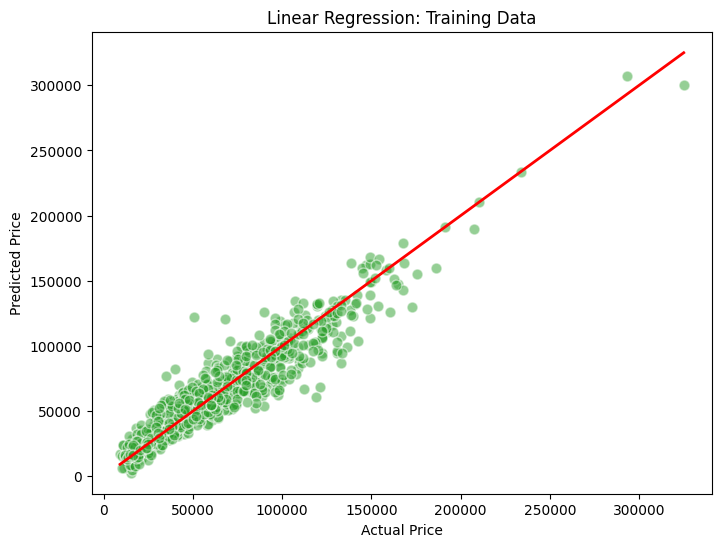

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# plt.scatter(x=y_train, y=y_lr_trainpredict, color='#2ca02c', alpha=0.3)
plt.scatter(
    x=y_train, 
    y=y_lr_trainpredict, 
    color='#2ca02c',  # Matplotlib's default green
    alpha=0.5,        # Slightly more opaque for better visibility
    edgecolor='white', # Adds clarity to point boundaries
    s=60              # Larger point size
)
plt.title('Linear Regression: Training Data')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.show()

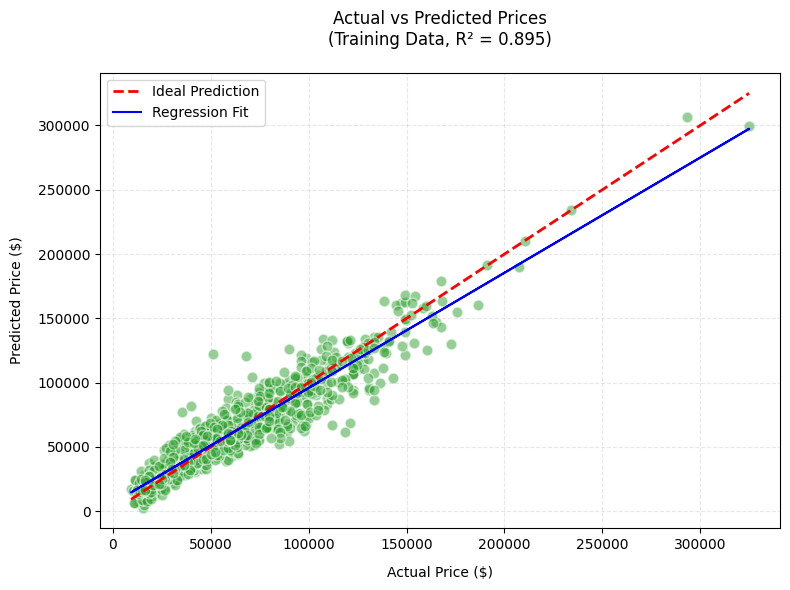

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

plt.figure(figsize=(8, 6))

# Scatter plot with improved aesthetics
plt.scatter(
    x=y_train, 
    y=y_lr_trainpredict, 
    color='#2ca02c',  # Matplotlib's default green
    alpha=0.5,        # Slightly more opaque for better visibility
    edgecolor='white', # Adds clarity to point boundaries
    s=60              # Larger point size
)

# Perfect prediction line (1:1 line)
plt.plot(
    [y_train.min(), y_train.max()], 
    [y_train.min(), y_train.max()], 
    '--',            # Dashed line
    color='red', 
    lw=2, 
    label='Ideal Prediction'
)

# Add regression line to show trend
z = np.polyfit(y_train, y_lr_trainpredict, 1)
p = np.poly1d(z)
plt.plot(
    y_train, 
    p(y_train), 
    color='blue',
    lw=1.5,
    label='Regression Fit'
)

# Add R² score to title
r2 = r2_score(y_train, y_lr_trainpredict)
plt.title(f'Actual vs Predicted Prices\n(Training Data, R² = {r2:.3f})', pad=20)

# Axis labels with units
plt.xlabel('Actual Price ($)', labelpad=10)
plt.ylabel('Predicted Price ($)', labelpad=10)

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

In [38]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming you have these from your training:
# lr = LinearRegression()
# preprocessor = ColumnTransformer(...)

# Save BOTH model and preprocessor together
joblib.dump({
    'model': lr,
    'preprocessor': preprocessor,
    'feature_names': x_train.columns.tolist()  # Save column order
}, 'laptop_price_predictor.pkl')

print("Model saved successfully!")

Model saved successfully!


In [39]:
import os
from pathlib import Path

# Option 1: Use absolute path
model_path = Path('path/to/your/laptop_price_predictor.pkl').absolute()

# Option 2: Place file in same directory as script
model_path = 'laptop_price_predictor.pkl' 

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

artifacts = joblib.load(model_path)

In [40]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', artifacts['preprocessor']),
    ('model', artifacts['model'])
])
print("Pipeline steps:", list(pipeline.named_steps.keys()))

Pipeline steps: ['preprocessor', 'model']


In [41]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# 1. Load model components
artifacts = joblib.load('laptop_price_predictor.pkl')
model = artifacts['model']
preprocessor = artifacts['preprocessor']

# 2. Manually define categorical and numerical features
categorical_features = ['Company', 'TypeName', 'Cpu', 'Gpu', 'ScreenResolution', 'OpSys']
numerical_features = ['Inches', 'Ram', 'Memory', 'Weight']

# 3. Prepare input data
input_data = {
    'Company': 'Apple',
    'TypeName': 'Ultrabook',
    'Inches': 13.3,
    'ScreenResolution': '2560x1600',
    'Cpu': 'Apple M2',
    'Ram': 16.0,
    'Memory': 512.0,
    'Gpu': 'Apple M2 10-core',
    'OpSys': 'macOS',
    'Weight': 1.4
}

# 4. Create DataFrame
input_df = pd.DataFrame([input_data])

# 5. MANUAL PREPROCESSING (bypass ColumnTransformer issues)
# Extract categorical and numerical data
X_cat = input_df[categorical_features]
X_num = input_df[numerical_features]

# Apply one-hot encoding manually
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(pd.DataFrame(preprocessor.transformers_[0][2], columns=categorical_features))  # Use original categories
X_cat_encoded = encoder.transform(X_cat)

# Combine features
X_processed = np.hstack([X_cat_encoded, X_num.values])

# 6. Verify dimensions
print(f"Processed features: {X_processed.shape[1]}")  # Should match model.coef_

# 7. Predict
try:
    price = model.predict(X_processed)[0]
    print(f"Predicted Price: ${price:,.2f}")
except Exception as e:
    print(f"Prediction failed: {str(e)}")
    print(f"Model expects {len(model.coef_)} features but got {X_processed.shape[1]}")

ValueError: Shape of passed values is (6, 1), indices imply (6, 6)

In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(58)

In [42]:
df.shape

(1303, 11)